<img src='https://blog.insaid.co/wp-content/uploads/2019/09/full-200-mm-1.png'/>

# ML-1 Insurance Data.
### Presented By: Sheetal Kumari
   __Nov19-Cohort.__

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Data Loading and Description](#section3)<br>
4. [EDA](#section4)<br>
    4.1 [Pandas Profiling](#section401)<br>
5. [Linear Regression](#section5)<br>
    5.1 [Standardization](#section501)<br>
    5.2 [Preparing x and y](#section502)<br>
    5.3 [Linear regression in scikit-learn](#section503)<br>
    5.4 [Calculating intercept and coefficients](#section504)<br>
    5.5 [Model Prediction](#section505)<br>
6. [Model Evaluation](#section6)<br>

<a id=section1></a>
## 1. Problem Statement

In this Insurance Dataset __'charges'__ is the __Target Variable__, Insurance of individual varies with following factores such as __age, smoker, bmi, sex, no.of children.__ In the following data set we are suppose to predict the charges with respect to the factors affecting it.

- Finding the __ML-Algo__ which can ***Predict the Insurance Charges.***
- What are the parameters which affect the most in insurance charges? 
- Is there any relation between __bmi__ and __smoker__ with insurance chrges ?

<a id=section2></a>
## 2. Importing Packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline

<a id=section3></a>
## 3. Data Loading and Description

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Observations:

-__Explanatory Variables:__
- age, sex, bmi, children, smoker, region.

-__Target Variable:__
- charges.

- There are no missing values.
- Range of Age are 18 to 64.
- Region is not giving much info so it can be dropped.

<a id=section4></a>
# 4. EDA

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df[df.duplicated(keep='first')]
df.drop_duplicates(inplace=True)

By __.Describe__ function can see their are no missing values in the data set and checking for the duplicates if any and removing it.

In [8]:
df.region.value_counts()     # Here Cardinality do not give much information and help in predicting the Insurance Charges.  

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [9]:
df.drop('region',axis=1, inplace=True)

In [10]:
df.head(2)

,age,sex,bmi,children,smoker,charges
0,19,female,27.90,0,yes,16884.9240
1,18,male,33.77,1,no,1725.5523


Rounding the __charges__ column upto 2 decimal point.

In [11]:
df= df.round(2)

In [12]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.90,0,yes,16884.92
1,18,male,33.77,1,no,1725.55
2,28,male,33.00,3,no,4449.46
3,33,male,22.70,0,no,21984.47
4,32,male,28.88,0,no,3866.86


<a id=section401></a>
### 4.1 Pandas Profiling

In [15]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas_profiling

In [ ]:
profile =df.profile_report(title='output')
profile.to_file(output_file='output.html')
pandas_profiling.ProfileReport(df)

### Observation:
- The data set includes 5 Numerical, 1 Bool, 1 Categorical 
- 7 variables including index
- No Missing and Dublicate values

__BMI:__
- Minimum: 15.96 
- Maximum: 53.13
To understand the Body Mass Index and the effect of BMI on the Insurance charges the below scale is helpful.
<img src= 'https://4617c1smqldcqsat27z78x17-wpengine.netdna-ssl.com/wp-content/uploads/bmi-arrow-chart.jpg'  />

__Warnings__:
children columns has in total 573 zeros which is (42.9%).
   - Which is ***Acceptable***,   

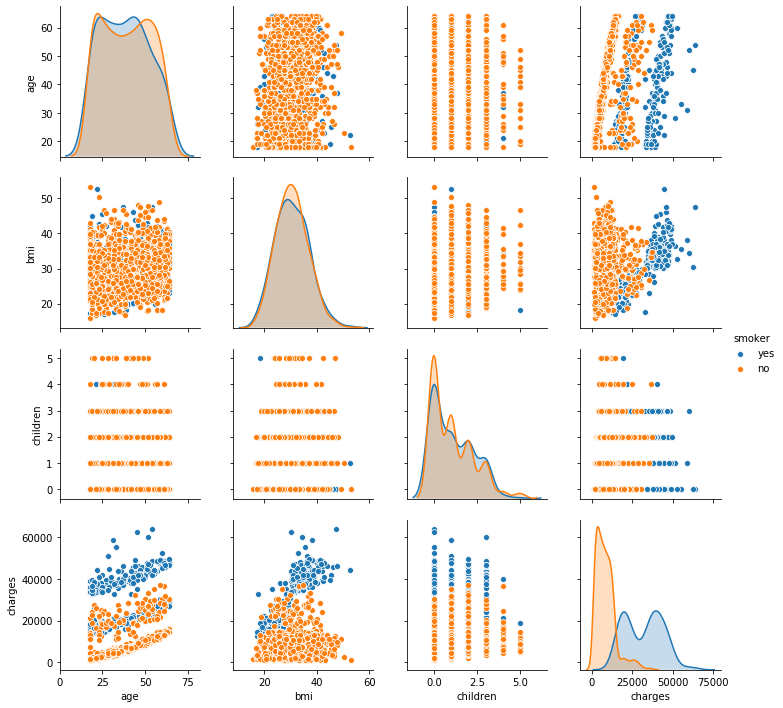

In [16]:
sns.pairplot(df, hue='smoker')

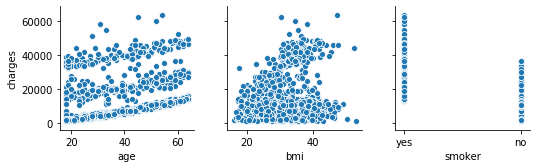

In [134]:
sns.pairplot(df, x_vars= ['age','bmi','smoker'],y_vars=['charges'])

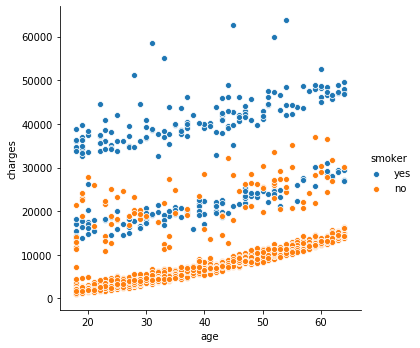

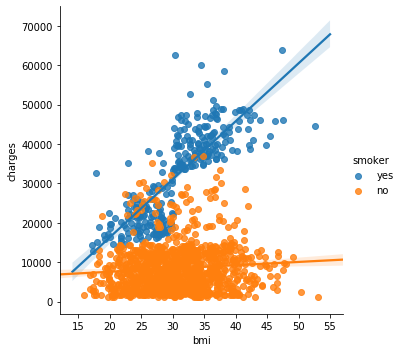

In [133]:
sns.pairplot(data= df,hue='smoker',x_vars= 'age' , y_vars='charges',aspect=1, height=5)
sns.lmplot(data= df,x= 'bmi' , y='charges' , hue='smoker')

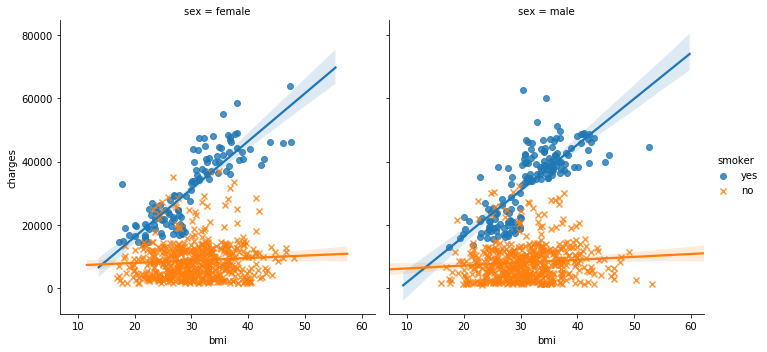

In [20]:
sns.lmplot(x='bmi' , y='charges' , data=df, col= 'sex',  hue='smoker', markers=['o','x'])

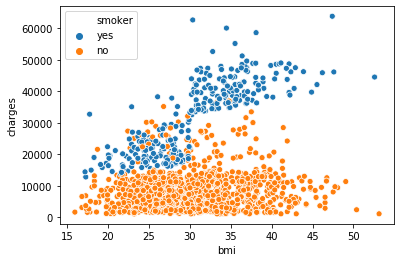

In [21]:
sns.scatterplot(data=df, x='bmi',y='charges',hue='smoker')

### ***Hence the above plot gives the answer to our problem statement.***

   - __SMOKER__ affects the most in the insurance charges.
   - Irrespective of high or low bmi if a person is a smoker its insurance charges is increasing Significantly.
   - Which is Same for both Male and Female.

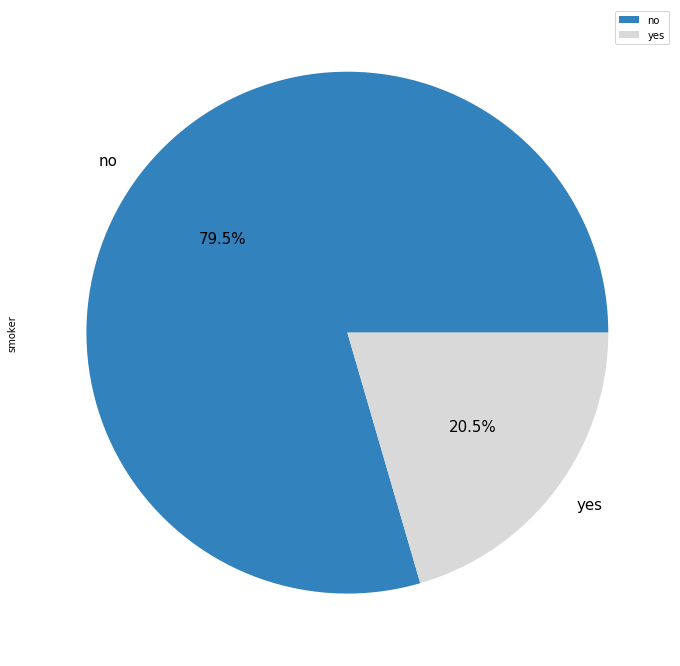

In [33]:
df['smoker'].value_counts().plot(kind='pie', autopct= '%3.1f%%',figsize=(12,12), legend=True, cmap='tab20c', fontsize=15)

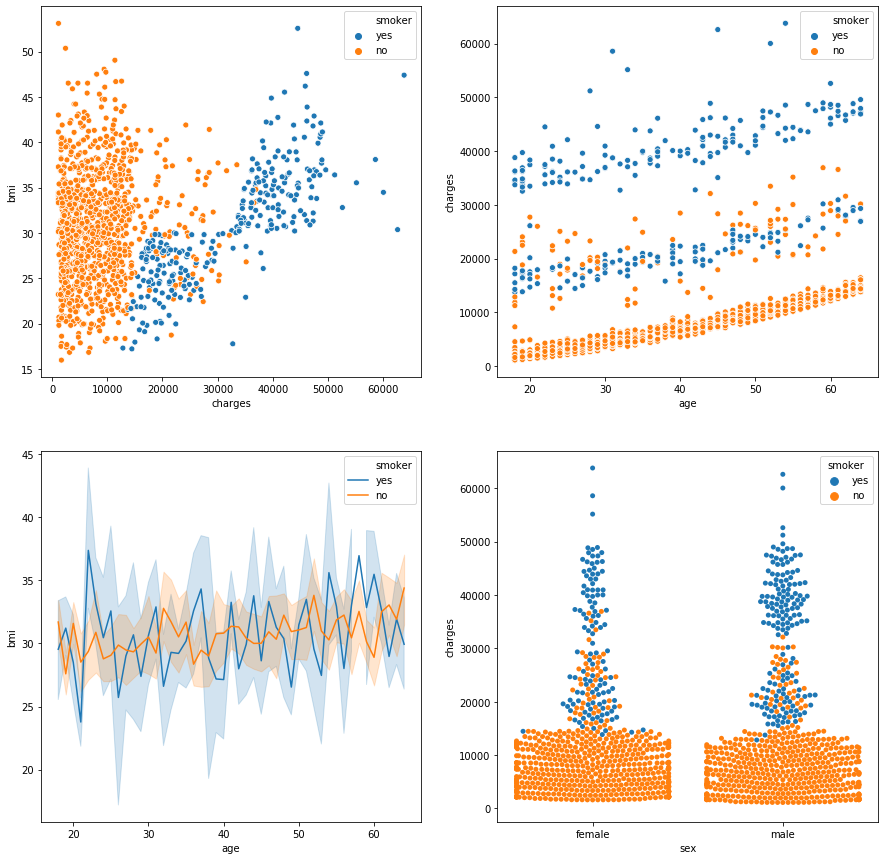

In [23]:
f, axes = plt.subplots(2, 2, figsize=(15, 15)) 

sns.scatterplot(data=df, x='charges',y='bmi',hue='smoker', ax=axes[0,0])# Set up the matplotlib figure

sns.scatterplot(data=df,x='age',y='charges', hue='smoker', ax=axes[0,1])

sns.lineplot(data=df,x='age',y='bmi', hue='smoker', ax=axes[1,0])

sns.swarmplot(x='sex',y='charges',data=df, hue= 'smoker' )

**Fig 1:**

***non smoker***- In most cases the charges for non smoker is approximatly starting from 2000 till 13000 which is in the range even if the bmi is increasing. There are only few cases where charges are going high till 35000 between the bmi range 25 to 43.

***smoker***- The Maximum charger of non smoker is the min charges for a smoker as the graph shows smoking is highly affecting the charges. The value of charges incresing rapidly with the increase in bmi, so there is a relation between smoker and bmi, with increse in bmi for smoker the chrges are also incresing.
 
**Fig 2:** With increase in age there is a  marginal increase in charges for smoker and non smoker few cases where its ranging from 12k to 30k. As shown in figure the charges of smoker is high with respect to age.
 
**Fig 3:** non smoker bmi is quite good as comapred to smoker.
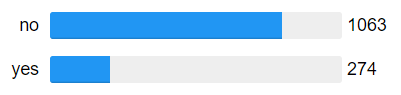

**Fig 4:** This plot shows the charges for male and female with respect to smoke can see non smokers charges are low and number of count is high. For smokers number of count is low but their charges are high.


In [13]:
corr= df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109347,0.041536,0.298308
bmi,0.109347,1.000000,0.012762,0.198391
children,0.041536,0.012762,1.000000,0.067389
charges,0.298308,0.198391,0.067389,1.000000


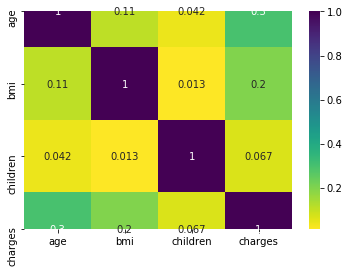

In [14]:
sns.heatmap(corr, cmap= 'viridis_r', annot=True)

There is no corelation between the columns.


<a id=section5></a>
## 5. Linear Regression

We are using Linear Regression to predict the Insurance Charges which is continuous in nature.
<img src = "https://miro.medium.com/max/2872/1*k2bLmeYIG7z7dCyxADedhQ.png" width='280' />

In [15]:
df.head(2)

,age,sex,bmi,children,smoker,charges
0,19,female,27.90,0,yes,16884.92
1,18,male,33.77,1,no,1725.55


### Dummification of categorical variable

In order to split the data into X and y and to apply Linear Regression we need to Dummify the columns sex and smokers and deleting the first variable in each column to minimise complexity.


In [16]:
df1 = pd.get_dummies(df,drop_first=True)
df1.head()

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.90,0,16884.92,0,1
1,18,33.77,1,1725.55,1,0
2,28,33.00,3,4449.46,1,0
3,33,22.70,0,21984.47,1,0
4,32,28.88,0,3866.86,1,0


<a id=section501></a>
### 5.1 Standardization

 - Fitting is determining what to do
 - Transforming actually doing it

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df1)
data1 = scaler.transform(df1)

In [18]:
data1= pd.DataFrame(data1)
data1

,0,1,2,3,4,5
0,-1.440418,-0.453206,-0.909234,0.297856,-1.009771,1.969660
1,-1.511647,0.509412,-0.079442,-0.954381,0.990324,-0.507702
2,-0.799350,0.383141,1.580143,-0.729373,0.990324,-0.507702
3,-0.443201,-1.305951,-0.909234,0.719104,0.990324,-0.507702
4,-0.514431,-0.292496,-0.909234,-0.777498,0.990324,-0.507702
...,...,...,...,...,...,...
1332,0.767704,0.050242,1.580143,-0.221263,0.990324,-0.507702
1333,-1.511647,0.206032,-0.909234,-0.914695,-1.009771,-0.507702
1334,-1.511647,1.014500,-0.909234,-0.962288,-1.009771,-0.507702
1335,-1.297958,-0.797584,-0.909234,-0.931054,-1.009771,-0.507702


In [19]:
data1.columns = ['age','bmi','children','charges','sex_male','smoker_yes']
data1.head()

,age,bmi,children,charges,sex_male,smoker_yes
0,-1.440418,-0.453206,-0.909234,0.297856,-1.009771,1.969660
1,-1.511647,0.509412,-0.079442,-0.954381,0.990324,-0.507702
2,-0.799350,0.383141,1.580143,-0.729373,0.990324,-0.507702
3,-0.443201,-1.305951,-0.909234,0.719104,0.990324,-0.507702
4,-0.514431,-0.292496,-0.909234,-0.777498,0.990324,-0.507702


<a id=section502></a>
### 5.2 Preparing x and y

splitting the data set into x (__Explanatory Variable__) and y (__Target Variable__)

In [20]:
x= data1[['age','bmi','children','sex_male','smoker_yes']]
x

,age,bmi,children,sex_male,smoker_yes
0,-1.440418,-0.453206,-0.909234,-1.009771,1.969660
1,-1.511647,0.509412,-0.079442,0.990324,-0.507702
2,-0.799350,0.383141,1.580143,0.990324,-0.507702
3,-0.443201,-1.305951,-0.909234,0.990324,-0.507702
4,-0.514431,-0.292496,-0.909234,0.990324,-0.507702
...,...,...,...,...,...
1332,0.767704,0.050242,1.580143,0.990324,-0.507702
1333,-1.511647,0.206032,-0.909234,-1.009771,-0.507702
1334,-1.511647,1.014500,-0.909234,-1.009771,-0.507702
1335,-1.297958,-0.797584,-0.909234,-1.009771,-0.507702


In [21]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(1337, 5)


In [22]:
y = data1.charges
y

0       0.297856
1      -0.954381
2      -0.729373
3       0.719104
4      -0.777498
          ...   
1332   -0.221263
1333   -0.914695
1334   -0.962288
1335   -0.931054
1336    1.310297
Name: charges, Length: 1337, dtype: float64

In [23]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1337,)


### Splitting x and y into training and test datasets.

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [41]:
print(x_train.shape)
print(x_test.shape)

(1069, 5)
(268, 5)


In [42]:
print(y_train.shape)
print(y_test.shape)

(1069,)
(268,)


<a id=section503></a>
### 5.3 Linear regression in scikit-learn

In [43]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<a id=section504></a>
### 5.4 Calculating intercept and coefficients

In [44]:
print('Intercept:',linreg.intercept_)        
print('Coefficients:',linreg.coef_) 

Intercept: 0.009848714477354586
Coefficients: [ 0.30145045  0.15490178  0.06742047 -0.0028798   0.80163233]


In [45]:
feature_cols = ['age','bmi','children','sex_male','smoker_yes']         

 __zipping__ the features to pair the feature names with the coefficients.

In [2]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)

NameError: name 'feature_cols' is not defined

In [47]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 0.009848714477354586
age 0.30145044584004366
bmi 0.15490177959652585
children 0.06742047117485944
sex_male -0.0028797957264678504
smoker_yes 0.8016323308144175


 `y = 0.0015 + 0.3003 * age + 0.1705 * bmi + 0.0461 * children + (-0.0063) * sex_male + 0.8007 * smoker_yes`

<a id=section505></a>
### 5.5 Model Prediction

In [48]:
y_pred_train = linreg.predict(x_train)  
y_pred_train

array([ 1.374379  ,  1.95753674, -0.05686057, ..., -0.44086709,
       -0.63988288,  0.07949648])

In [49]:
y_pred_test = linreg.predict(x_test)
print(y_pred_test)
print(y_pred_test.shape)

[-0.89174678 -0.15496355 -0.20697477 -0.75584287  0.00740086  1.46884614
 -0.88207119 -0.83361952 -0.84804714 -0.25645582  1.16618724  0.33827791
  1.1565955  -0.82278695  1.28173053 -0.74580199  0.12826884 -0.05697992
 -0.40603559  1.19803813 -0.64687693  1.8275254   1.2503668  -0.98783392
 -0.15654106  1.18280342  0.25270445 -0.868474   -0.93454918 -0.84576868
 -0.38924567 -0.98295556 -0.29625983 -0.51625215 -0.47971502  1.15832794
  1.20666061 -0.32291647 -1.03480547 -0.55140978 -0.067568   -0.48281531
 -0.15958064  1.78799661 -0.12349801  1.14257854  0.05129307 -0.63431787
 -0.29306292 -0.56438698 -0.3143558  -0.69676242 -0.37126632 -0.42891823
  0.26318416  0.07327514  1.8535766  -0.61164354 -0.22524433 -0.7347995
 -0.62201344  1.80570099  1.61413827 -0.42120229  0.16059782 -0.4582764
 -0.96920761 -0.20519407 -0.60629187 -0.14321959 -0.89856146 -0.5009106
 -0.36611785 -0.91898544  2.08086031 -0.31792786  1.44321318  1.55451725
  0.07709203 -0.11934215 -0.27023961 -0.32113166  1.24

In [52]:
from sklearn import metrics
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df

,Actual,Predicted
192,-0.920339,-0.891747
834,-0.505442,-0.154964
131,0.027858,-0.206975
369,-0.809300,-0.755843
1065,-0.355278,0.007401
...,...,...
423,-0.871623,-0.768546
368,-0.426476,-0.212358
900,2.923752,2.231322
555,-0.779083,-0.764720


<a id=section6></a>
## 6. Model Evaluation

### Using RMSE

In [112]:
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
RMSE_test

0.5033801809255821

In [113]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
RMSE_train

0.4998184249795505

In [114]:
print('RMSE for Training data is {}. \nRMSE for Test data is {}'.format(RMSE_train, RMSE_test))

RMSE for Training data is 0.4998184249795505. 
RMSE for Test data is 0.5033801809255821


### Using R Square:

In [115]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.7472908610571425

### Adjusted R-Square

In [116]:
SS_Residual = sum((y_test-y_pred_test)**2)

SS_Total = sum((y_test-np.mean(y_test))**2)

r_squared = 1 - (float(SS_Residual))/SS_Total

adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
adjusted_r_squared

0.7424681675658665